In [1]:
import cv2
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_img(file):
    values=[]
    for i in file:
        if ".png" in i and "groundTruth" not in i:
            val=cv2.imread(i)
            val=cv2.resize(val,(128,128))
            low=np.array([100,100,100])
            high=np.array([255,255,255])
            mask=cv2.inRange(val,low,high)
            values.append(mask)
    return values
            
            

In [61]:
from glob import glob
p=glob("*")
print(p)
values=load_img(p)

['manganese.png', 'magnetic.png', 'gravity.png', 'gis.ipynb', 'copper.png', 'iron.png', 'groundTruth.png']


In [62]:
values=np.array(values)
print(values.shape)

(5, 128, 128)


In [63]:
values=values.reshape(128,128,5)

In [59]:
values=values.reshape(128*128,5)

In [60]:
import pandas as pd 
dt=pd.DataFrame(values)
dt

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
16379,0,0,0,0,0
16380,0,255,255,255,255
16381,255,255,255,255,255
16382,255,255,255,255,255


In [38]:
copper=cv2.imread("copper.png")
print(copper.shape)
copper=cv2.resize(copper,(128,128))
print(copper.shape)

(2586, 2561, 3)
(128, 128, 3)


In [39]:
low=np.array([100,100,100])
high=np.array([255,255,255])
mask=cv2.inRange(copper,low,high)


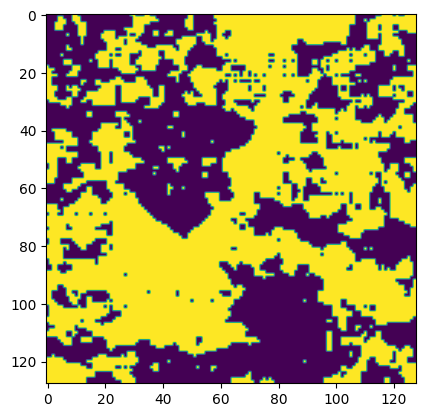

In [40]:
plt.imshow(mask)

In [41]:
gravity=cv2.imread("gravity.png")
print(gravity.shape)
gravity=cv2.resize(gravity,(128,128))
print(gravity.shape)

(2586, 2561, 3)
(128, 128, 3)


In [42]:
low=np.array([100,100,100])
high=np.array([255,255,255])
mask1=cv2.inRange(gravity,low,high)


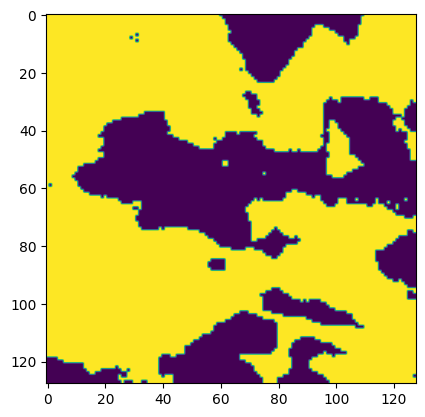

In [43]:
plt.imshow(mask1)

(2586, 2561, 3)
(128, 128, 3)


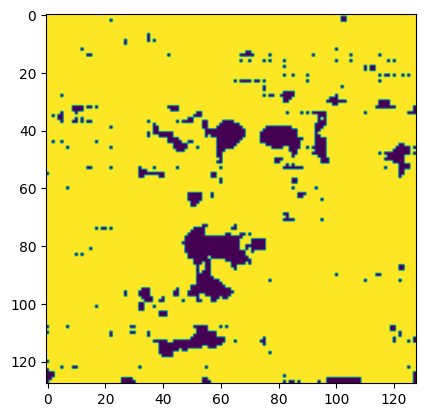

In [44]:
iron=cv2.imread("iron.png")
print(iron.shape)
iron=cv2.resize(iron,(128,128))
print(iron.shape)
low=np.array([100,100,100])
high=np.array([255,255,255])
iron1=cv2.inRange(iron,low,high)
plt.imshow(iron1)

(2586, 2561, 3)
(128, 128, 3)


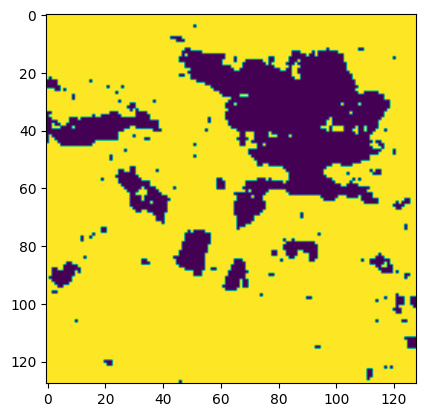

In [45]:
magnetic=cv2.imread("magnetic.png")
print(magnetic.shape)
magnetic=cv2.resize(magnetic,(128,128))
print(magnetic.shape)
low=np.array([100,100,100])
high=np.array([255,255,255])
magnetic1=cv2.inRange(magnetic,low,high)
plt.imshow(magnetic1)

(2586, 2561, 3)
(128, 128, 3)


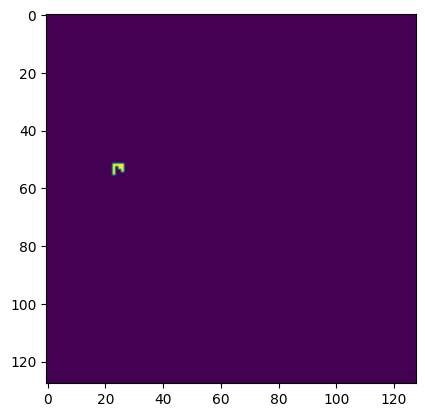

In [28]:
manganese=cv2.imread("manganese.png")
print(manganese.shape)
manganese=cv2.resize(manganese,(128,128))
print(manganese.shape)
low=np.array([100,100,100])
high=np.array([255,255,255])
manganese1=cv2.inRange(manganese,low,high)
plt.imshow(manganese1)

(2586, 2561, 3)
(128, 128, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


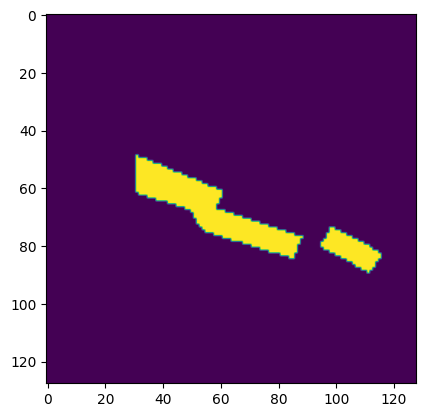

In [65]:
classval=cv2.imread("groundTruth.png")
print(classval.shape)
classval=cv2.resize(classval,(128,128))
print(classval.shape)
low=np.array([100,100,100])
high=np.array([255,255,255])
classval1=cv2.inRange(classval,low,high)
print(classval1)
plt.imshow(classval1)

In [48]:
features=[mask,mask1,iron1,magnetic1,manganese1]

In [49]:
features=np.array(features)
print(features.shape)

(5, 128, 128)


In [50]:
features=features.reshape(128,128,5)

In [51]:
classval1=np.array(classval1)
print(classval1.shape)

(128, 128)


In [78]:
classval1=classval1/255.0
classval1=classval1.reshape(128,128,1)

In [79]:
print(classval1.shape)

(128, 128, 1)


In [81]:
classval1=classval1//255
print(classval1.shape)
classval1=list(classval1)
for i in classval1:
    if i!=0:
        print(i)

(2586, 2561)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,classval1,test_size=0.1)

In [70]:
print(x_train.shape)

(2327, 2561, 5)


In [71]:
from keras import Sequential
from keras.layers import Dense,Conv1D,Input,Flatten
from keras.backend import clear_session

clear_session()
model=Sequential()
model.add(Input(shape=(2561,5)))
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Flatten())
model.add(Dense(1,activation="tanh"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2561, 128)         768       
                                                                 
 dense_1 (Dense)             (None, 2561, 256)         33024     
                                                                 
 flatten (Flatten)           (None, 655616)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 655617    
                                                                 
Total params: 689,409
Trainable params: 689,409
Non-trainable params: 0
_________________________________________________________________


In [30]:
#values=values.reshape(5,128,128,1)
print(values.shape)

(5, 128, 128, 1)


In [77]:
from keras import Sequential
from keras.layers import Dense,Conv1D,Conv2D,Input,Flatten,MaxPool2D,MaxPool1D,BatchNormalization,UpSampling1D,LayerNormalization
from keras.backend import clear_session
clear_session()
model=Sequential()
model.add(Input(shape=(5,)))
model.add(Dense(128,activation="tanh"))
model.add(Dense(256,activation="tanh"))
model.add(BatchNormalization(2))
#model.add(Flatten())
#model.add(UpSampling1D())
model.add(Dense(128,activation="tanh"))
model.add(Dense(128,activation = "softmax"))


ValueError: Invalid value for `axis` argument. Expected 0 <= axis < inputs.rank (with inputs.rank=2). Received: axis=(2,)

In [74]:
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128, 128)          768       
                                                                 
 dense_1 (Dense)             (None, 128, 256)          33024     
                                                                 
 batch_normalization (BatchN  (None, 128, 256)         1024      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 128, 128)          32896     
                                                                 
 dense_3 (Dense)             (None, 128, 128)          16512     
                                                                 
Total params: 84,224
Trainable params: 83,712
Non-trainable params: 512
__________________________________________________

In [46]:
classval1=classval1.reshape(1,128,128)

In [69]:
classval1.shape

(128, 128)

In [75]:
model.fit(values,classval1,30,100,verbose=1)

Epoch 1/100


ValueError: in user code:

    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 128) and (None, 128, 128) are incompatible


In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def resize(input_image, input_mask):
   input_image = tf.image.resize(input_image, (128, 128), method="nearest")
   input_mask = tf.image.resize(input_mask, (128, 128), method="nearest")
   return input_image, input_mask

In [4]:
def normalize(input_image, input_mask):
   input_image = tf.cast(input_image, tf.float32) / 255.0
   input_mask -= 1
   return input_image, input_mask

In [5]:
def load_image_train(datapoint):
   input_image = datapoint["image"]
   input_mask = datapoint["segmentation_mask"]
   input_image, input_mask = resize(input_image, input_mask)
   #input_image, input_mask = augment(input_image, input_mask)
   input_image, input_mask = normalize(input_image, input_mask)
   return input_image, input_mask

In [20]:
features=features/255.0
print(features.shape)

(2586, 2561, 5)


In [22]:
def double_conv_block(x, n_filters):
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   return x

In [23]:
def downsample_block(x, n_filters):
   f = double_conv_block(x, n_filters)
   p = layers.MaxPool2D(2)(f)
   p = layers.Dropout(0.3)(p)
   return f, p

In [24]:
def upsample_block(x, conv_features, n_filters):
   # upsample
   x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
   # concatenate
   x = layers.concatenate([x, conv_features])
   # dropout
   x = layers.Dropout(0.3)(x)
   # Conv2D twice with ReLU activation
   x = double_conv_block(x, n_filters)

   return x

In [58]:
from keras.backend import clear_session
clear_session()

In [63]:
 # inputs
def build_unet_model():
   
   inputs = layers.Input(shape=(128,128,5))

   # encoder: contracting path - downsample
   # 1 - downsample
   f1, p1 = downsample_block(inputs, 64)
   # 2 - downsample
   f2, p2 = downsample_block(p1, 128)
   # 3 - downsample
   f3, p3 = downsample_block(p2, 256)
   # 4 - downsample
   f4, p4 = downsample_block(p3, 512)

   # 5 - bottleneck
   bottleneck = double_conv_block(p4, 1024)

   # decoder: expanding path - upsample
   # 6 - upsample
   u6 = upsample_block(bottleneck, f4, 512)
   # 7 - upsample
   u7 = upsample_block(u6, f3, 256)
   # 8 - upsample
   u8 = upsample_block(u7, f2, 128)
   # 9 - upsample
   u9 = upsample_block(u8, f1, 64)

   # outputs
   outputs = layers.Conv2D(1, 1, padding="same", activation = "softmax")(u9)

   # unet model with Keras Functional API
   unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

   return unet_model

In [64]:
unet_model = build_unet_model()
unet_model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 5  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 128, 128, 64  2944        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_21 (Conv2D)             (None, 128, 128, 64  36928       ['conv2d_20[0][0]']              
                                )                                                             

In [65]:
unet_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics="accuracy")

In [67]:
print(features.shape)

(128, 128, 5)


In [66]:
NUM_EPOCHS = 20
#TRAIN_LENGTH = info.splits["train"].num_examples
#STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
#VAL_SUBSPLITS = 5
#TEST_LENTH = info.splits["test"].num_examples
#VALIDATION_STEPS = TEST_LENTH // BATCH_SIZE // VAL_SUBSPLITS
model_history = unet_model.fit(features,
                              epochs=NUM_EPOCHS,batch_size=100)

Epoch 1/20


ValueError: in user code:

    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/hrithikpaul/.local/lib/python3.8/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "U-Net" is incompatible with the layer: expected shape=(None, 128, 128, 5), found shape=(None, 128, 5)
